In [1]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [7]:
from selenium import webdriver
from textblob import TextBlob
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
import json

# Set up Google Chrome WebDriver
options = Options()
options.add_argument("--headless")  # Optional: Run in headless mode
options.add_argument("--no-sandbox")  # Prevent sandboxing issues
options.add_argument("--disable-dev-shm-usage")  # Address shared memory issues

# Install ChromeDriver using WebDriverManager and launch the browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Example URL for scraping (replace with your target URL)
url = 'https://discussions.apple.com/community/airpods'
driver.get(url)

# Pause to let the page load
time.sleep(5)

# Initialize list to store reviews
apple_reviews = []

# Loop through multiple pages
for page_num in range(1, 35):  # Adjust the range as needed
    print(f"Scraping page {page_num}")
    
    # Find all discussion containers on the current page
    posts = driver.find_elements(By.CSS_SELECTOR, "article.community-post")  # Correct CSS selector for posts
    
    # Extract and store the discussion data
    for post in posts:
        try:
            # Extract the question title
            question_element = post.find_element(By.CSS_SELECTOR, "a.content-post-title.link-standalone")
            question = question_element.text.strip()
            question_url = question_element.get_attribute("href")
            
            # Extract the latest activity timestamp
            date_element = post.find_element(By.CSS_SELECTOR, "span.highlightTime")
            date = date_element.text.strip()
            
            # Perform sentiment analysis
            analysis = TextBlob(question)
            sentiment = (
                'Positive' if analysis.sentiment.polarity > 0 else
                'Negative' if analysis.sentiment.polarity < 0 else
                'Neutral'
            )

            # Append the data to the list
            apple_reviews.append({
                'Date': date,
                'Question': question,
                'URL': f"https://discussions.apple.com{question_url}",
                'Sentiment': sentiment
            })
            print({
                'Date': date,
                'Question': question,
                'URL': f"https://discussions.apple.com{question_url}",
                'Sentiment': sentiment
            })
        except Exception as e:
            print(f"Error extracting post data: {e}")
            continue
    
    # Click the "Next" button to go to the next page if it exists
    '''try:
        next_button = driver.find_element(By.LINK_TEXT, ">")
        next_button.click()
        time.sleep(5)  # Pause to let the next page load
    except Exception as e:
        print(f"No more pages after page {page_num}: {e}")
        break'''
    try:
    # Locate the "Next" button by its class name or other attributes
        next_button = driver.find_element(By.CSS_SELECTOR, ".next-page.icon.icon-standalone.icon-chevronright")
        next_button.click()
        time.sleep(5)  # Pause to let the next page load
    except Exception as e:
        print(f"No more pages after page {page_num}: {e}")
        break

# Close the browser
driver.quit()

# Save the reviews to a JSON file
with open('apple_reviews_google_chrome.json', 'w', encoding='utf-8') as json_file:
    json.dump(apple_reviews, json_file, ensure_ascii=False, indent=4)

print(f"Scraped data saved to 'apple_reviews_google_chrome.json'")


Scraping page 1
{'Date': '', 'Question': 'Verificar Airpods', 'URL': 'https://discussions.apple.comhttps://discussions.apple.com/thread/255896719', 'Sentiment': 'Neutral'}
{'Date': '2 hours ago', 'Question': 'Left AirPod chirping during use', 'URL': 'https://discussions.apple.comhttps://discussions.apple.com/thread/255896515', 'Sentiment': 'Neutral'}
{'Date': '', 'Question': 'AirPods Pro right pod is not working', 'URL': 'https://discussions.apple.comhttps://discussions.apple.com/thread/255896048', 'Sentiment': 'Positive'}
{'Date': '', 'Question': 'Switching airpods max between my devices', 'URL': 'https://discussions.apple.comhttps://discussions.apple.com/thread/255896573', 'Sentiment': 'Neutral'}
{'Date': '', 'Question': 'Using AirPods Pro 2 on flights.', 'URL': 'https://discussions.apple.comhttps://discussions.apple.com/thread/255896519', 'Sentiment': 'Neutral'}
{'Date': '', 'Question': 'AirPods Max Noise Cancellation feature is not working', 'URL': 'https://discussions.apple.comhtt

In [9]:
with open('apple_reviews_selenium.txt', 'w') as f:
    for review in apple_reviews[:500]:  # Limit to 500 reviews
        # Extract the review text using the correct key
        review_text = review.get('review_text', '')  # Default to empty string if key is missing
        f.write(review_text + '\n')

print(f"Total reviews extracted: {len(apple_reviews)}")

Total reviews extracted: 510


In [17]:
import pandas as pd
import json

# Load the reviews JSON file directly from the given path
file_path = '/Users/aech/Downloads/apple_reviews_google_chrome.json'

with open(file_path, 'r', encoding='utf-8') as f:
    apple_feedback = json.load(f)

# Convert JSON to DataFrame
df = pd.DataFrame(apple_feedback)

apple_feedback

df.to_csv('apple_feedback.csv', index=False)



In [23]:

import re


# Define a mapping of patterns to AirPods types
airpods_types =    { r'\bairpods?\s*1(st)?\b': 'AirPods (1st gen)',
    r'\bairpods?\s*2(nd)?\b': 'AirPods (2nd gen)',
    r'\bairpods?\s*3(rd)?\b': 'AirPods (3rd gen)',
    r'\bairpods?\s*4(th)?\b': 'AirPods (4th gen)',
    r'\bairpods?\s*pro\s*1(st)?\b': 'AirPods Pro (1st gen)',
    r'\bairpods?\s*pro\s*2(nd)?\b': 'AirPods Pro (2nd gen)',
    r'\bairpods?\s*pro\s*3(rd)?\b': 'AirPods Pro (3rd gen)',
    r'\bairpods?\s*max\b': 'AirPods Max (1st gen)',
    r'\bgen\s*1\b': 'AirPods (1st gen)',
    r'\bgen\s*2\b': 'AirPods (2nd gen)',
    r'\bgen\s*3\b': 'AirPods (3rd gen)',
    r'\bgen\s*4\b': 'AirPods (4th gen)',
    r'\bpro\s*gen\s*1\b': 'AirPods Pro (1st gen)',
    r'\bpro\s*gen\s*2\b': 'AirPods Pro (2nd gen)',
    r'\bpro\s*gen\s*3\b': 'AirPods Pro (3rd gen)',
    r'\bmax\b': 'AirPods Max (1st gen)',
    r'noise\s*cancellation': 'AirPods Pro',
    r'static|crackling': 'AirPods Pro',
    r'firmware\s*7B21': 'AirPods Pro (2nd gen)',
    r'hearing\s*aids': 'AirPods Pro',
    r'find\s*my\s*app': 'AirPods Pro',
    r'airpods': 'AirPods (1st gen)',
    r'Airpods 3': 'AirPods (3rd gen)',
    r'Airpods 2': 'AirPods (2nd gen)',
    r'Airpods 1': 'AirPods (1st gen)',
    r'airpod ': 'AirPods (1st gen)',
    r'airpod 2': 'AirPods (2nd gen)',
    r'airpod 3': 'AirPods (3rd gen)',
    r'Airpods ': 'AirPods (1st gen)',
    r'Airpod Pro': 'AirPods Pro (1st gen)',              
    r'replacement\s*airpods?': 'Unknown Replacement',
    r'warranty': 'Unknown Warranty',
}

def identify_airpods_type(question):
    for pattern, airpods_type in airpods_types.items():
        if re.search(pattern, question, re.IGNORECASE):
            return airpods_type
    return 'Unknown'  # Default if no match is found

# Apply the function to add a 'Type' column
for item in apple_feedback:
    item['Type'] = identify_airpods_type(item['Question'])

# Convert to DataFrame (optional, for easier analysis)


df = pd.DataFrame(apple_feedback)
print(df[['Date','Question', 'Type','Sentiment']])


            Date                                           Question  \
0                                                 Verificar Airpods   
1    2 hours ago                    Left AirPod chirping during use   
2                              AirPods Pro right pod is not working   
3                          Switching airpods max between my devices   
4                                   Using AirPods Pro 2 on flights.   
..           ...                                                ...   
505  3 weeks ago  Hearing Health doesn't show in Airpod Pro sett...   
506  3 weeks ago              Airpods not connecting to any devices   
507  3 weeks ago  bluetooth automatically connecting to wrong de...   
508  3 weeks ago                 AirPods Max Microphone Not Working   
509  3 weeks ago           Phone calls on AirPod Pros 2 cutting out   

                      Type Sentiment  
0        AirPods (1st gen)   Neutral  
1        AirPods (1st gen)   Neutral  
2        AirPods (1st gen)  Po

In [27]:
# Count 'Unknown' in the 'Type' column
unknown_count = df['Type'].value_counts().get('Unknown', 0)
print(f"Number of Unknown types: {unknown_count}")


Number of Unknown types: 49


In [29]:
unknown_rows = df[df['Type'] == 'Unknown']

# Print the rows where Type is 'Unknown'
print(unknown_rows)

             Date                                           Question  \
7                      Battery and light issues with my right AirPod   
8    10 hours ago  Right EarPods does not work, despite making so...   
50     2 days ago            Does this also work with only the case?   
63     2 days ago  Пропала возможность отключения режима прозрачн...   
65     2 days ago  Apple Health shows Hearing Test Unavailable on...   
76     3 days ago  Hearing test option not showing up on Sequoia ...   
84     4 days ago  How can I prevent incorrect notifications from...   
119    6 days ago      Hearing pods cutting out during use on iPhone   
133    1 week ago              apple still hasn't processed my order   
145                левый наушник в режиме прозрачности тише чем п...   
174    1 week ago             Spatial audio not working on Iphone 13   
181    1 week ago      Air Pods 2 won't connect to MP3 Player YFFiZQ   
192    1 week ago  Air Pods 4 sound louder in the left earpiece 

/var/folders/8_/1lzfszkx04q58l1r0mdcnw2c0000gn/T/ipykernel_33305/249132863.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


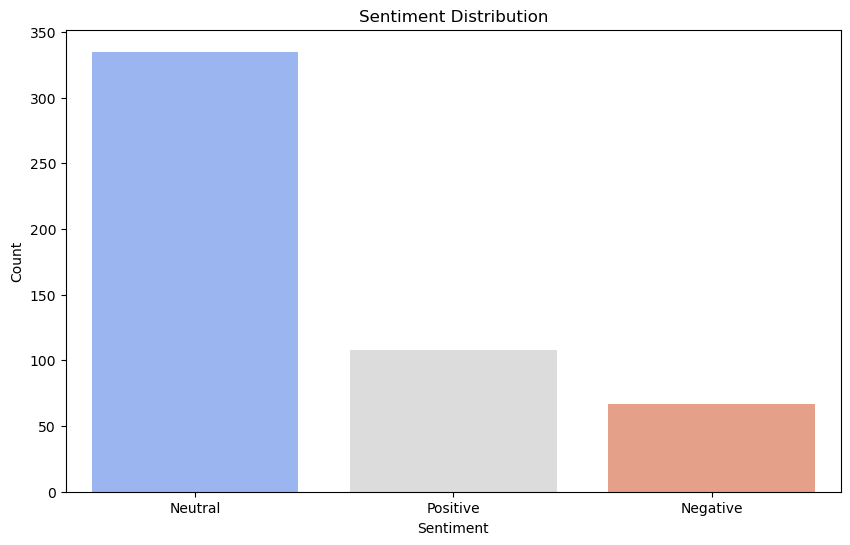

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
df = pd.DataFrame(apple_feedback)

# Plot Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



/var/folders/8_/1lzfszkx04q58l1r0mdcnw2c0000gn/T/ipykernel_33305/1061206815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


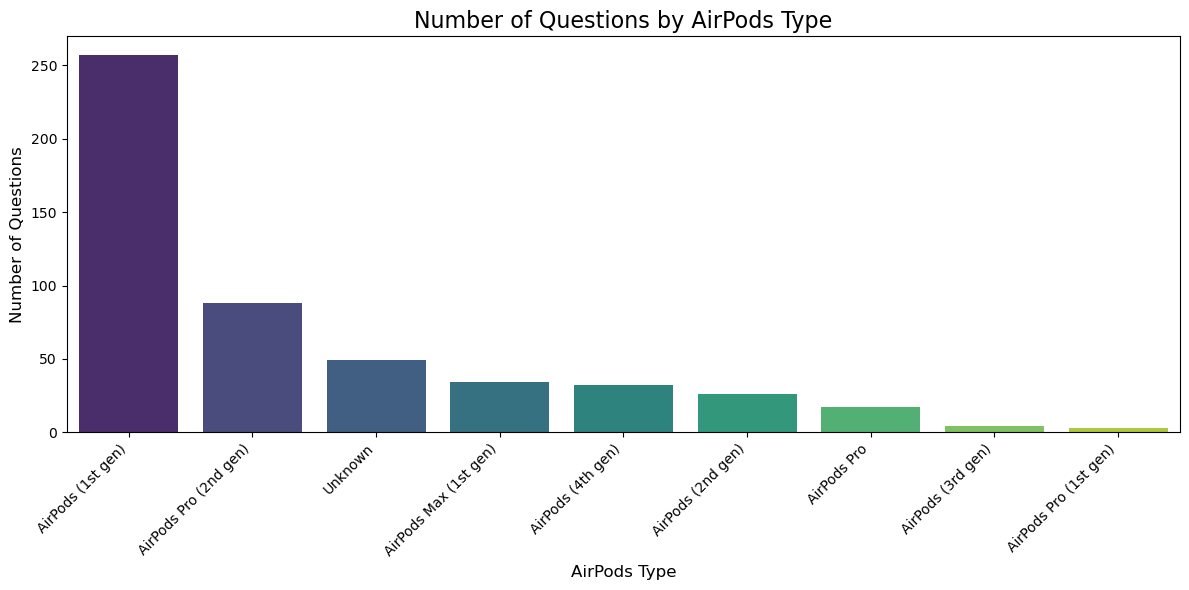

In [39]:
# Create a count of AirPods types
type_counts = df['Type'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')

# Customize the plot
plt.title('Number of Questions by AirPods Type', fontsize=16)
plt.xlabel('AirPods Type', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.tight_layout()

# Show the plot
plt.show()

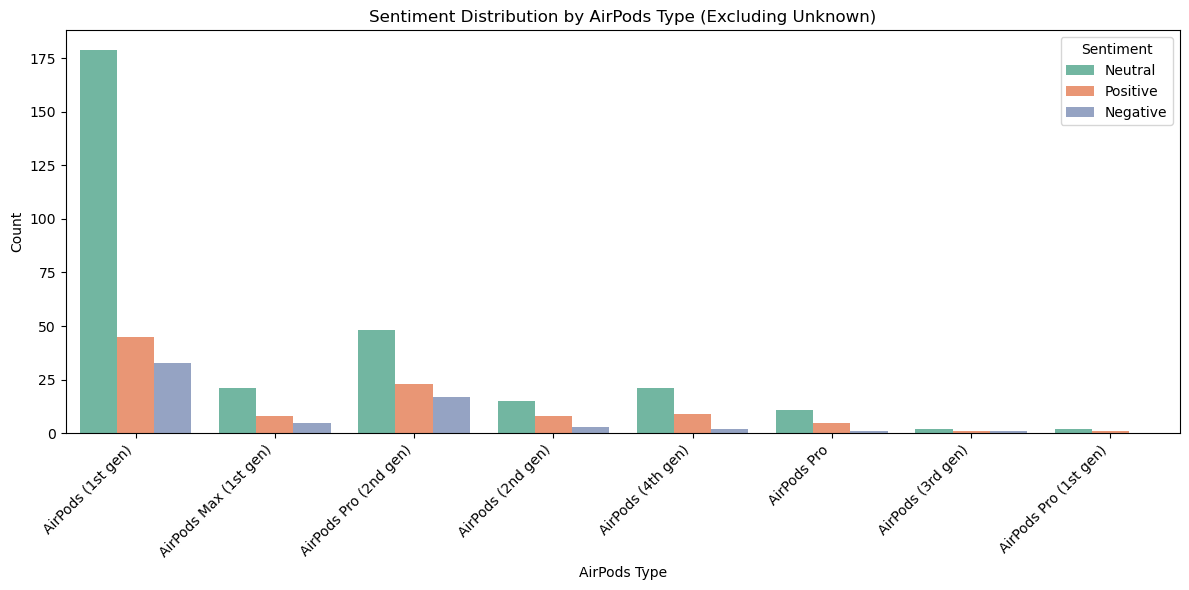

In [41]:
df_filtered = df[df['Type'] != 'Unknown']

# Create a count plot for sentiment distribution by product type
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', hue='Sentiment', data=df_filtered, palette='Set2')

# Customize the plot
plt.title('Sentiment Distribution by AirPods Type (Excluding Unknown)')
plt.xlabel('AirPods Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

          Word  Count
1      airpods    360
8          pro    172
2  airpods pro    131
0       airpod    103
9        sound     46
3         case     42
6       iphone     40
7          max     35
4          gen     34
5      hearing     32


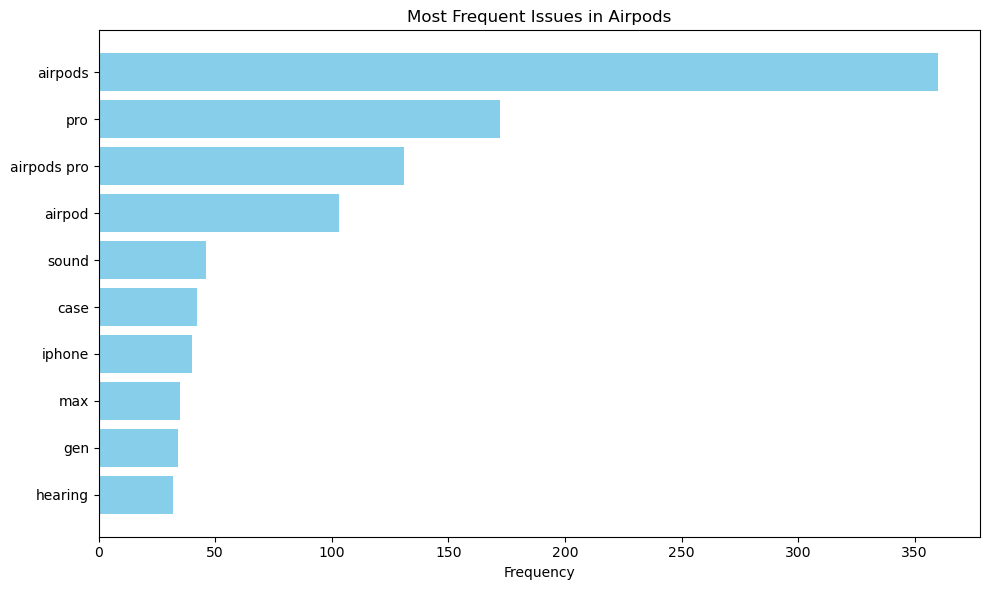

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string

# Assuming you already have the DataFrame `df` with a 'Question' column

# Preprocess and clean the text
def clean_text(text):
    # Convert to lowercase, remove punctuation and stopwords
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    return text

# Apply the cleaning function to the 'Question' column
df['cleaned_question'] = df['Question'].apply(clean_text)

# Create a CountVectorizer to count word frequencies
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10)

# Fit and transform the cleaned questions to extract common words and bigrams (pairs of words)
X = vectorizer.fit_transform(df['cleaned_question'])

# Get the word counts
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# Create a DataFrame for easier visualization
word_count_df = pd.DataFrame({'Word': words, 'Count': word_counts})

# Sort the words by count to find the most frequent issues
word_count_df = word_count_df.sort_values(by='Count', ascending=False)

# Print the most frequent issues (top 10)
print(word_count_df.head(10))

# Plot the top 10 most frequent issues
plt.figure(figsize=(10, 6))
plt.barh(word_count_df['Word'].head(10), word_count_df['Count'].head(10), color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Frequent Issues in Airpods')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent at the top
plt.tight_layout()
plt.show()


In [43]:
#1. Sentiment Analysis with VADER:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Make sure to download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample data (replace this with your actual DataFrame)
# Assuming df has a 'Question' column with the text
df = pd.DataFrame(apple_feedback)  # Example, adjust as per your data structure

# Function to categorize sentiment
def get_sentiment(apple_feedback):
    sentiment_score = sia.polarity_scores(apple_feedback)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Question' column
df['Sentiment_VADER'] = df['Question'].apply(get_sentiment)

# Show the results
print(df[['Question', 'Sentiment_VADER']].head())


                                   Question Sentiment_VADER
0                         Verificar Airpods         Neutral
1           Left AirPod chirping during use         Neutral
2      AirPods Pro right pod is not working         Neutral
3  Switching airpods max between my devices         Neutral
4           Using AirPods Pro 2 on flights.         Neutral


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aech/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/var/folders/8_/1lzfszkx04q58l1r0mdcnw2c0000gn/T/ipykernel_25303/4027259366.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_VADER', data=df, order=sentiment_counts.index, palette='Set2')


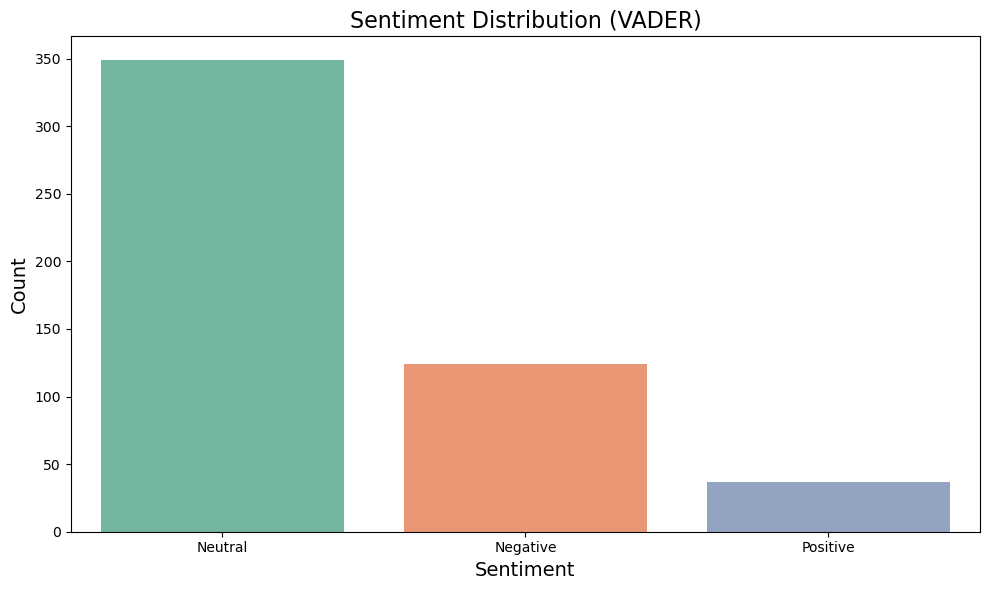

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of occurrences of each sentiment
sentiment_counts = df['Sentiment_VADER'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_VADER', data=df, order=sentiment_counts.index, palette='Set2')
plt.title('Sentiment Distribution (VADER)', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


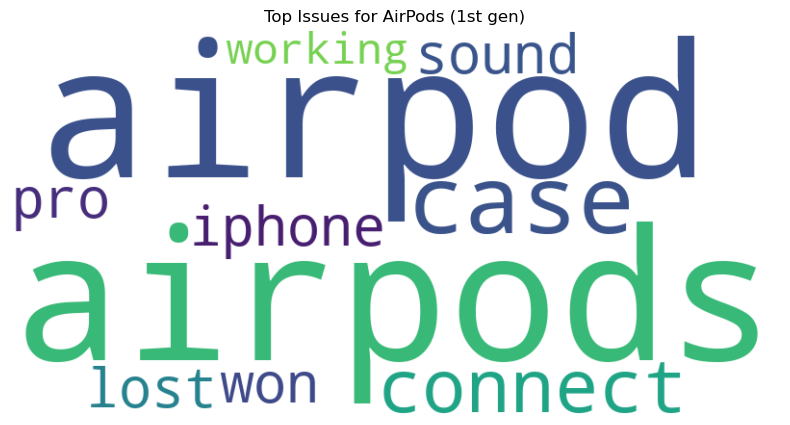

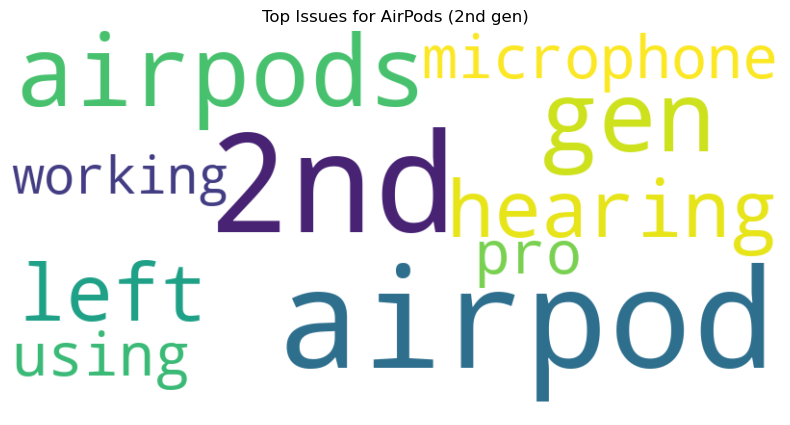

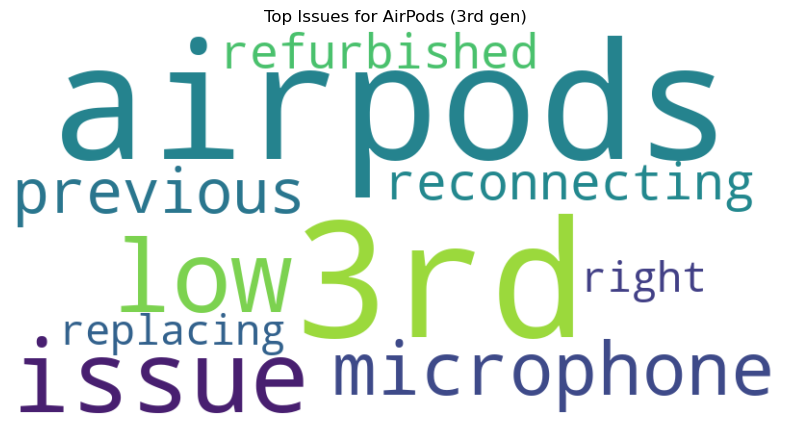

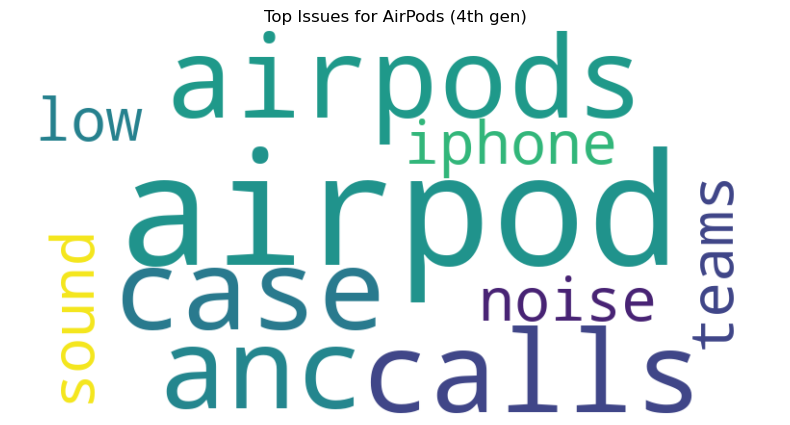

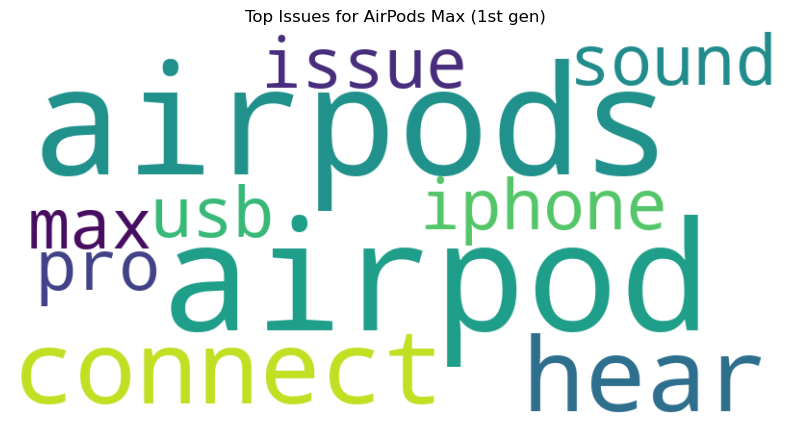

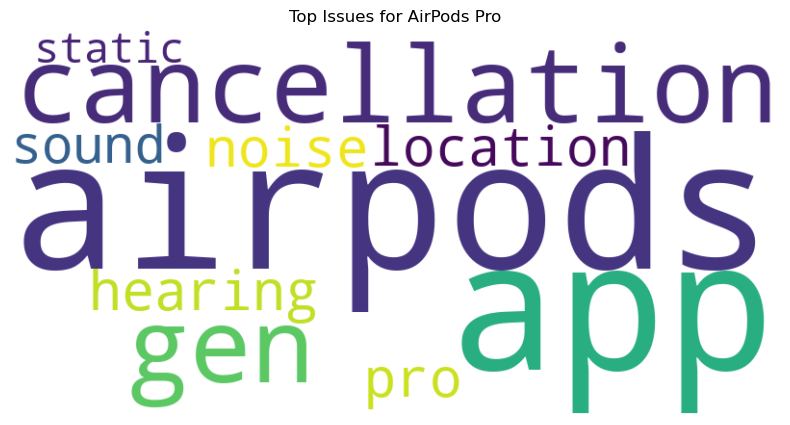

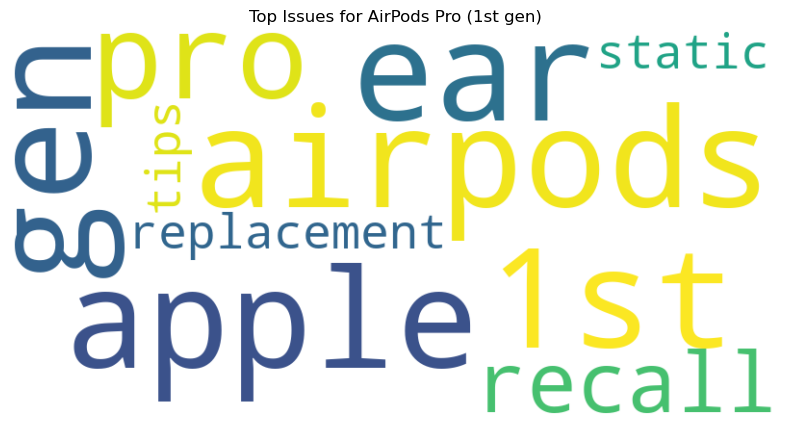

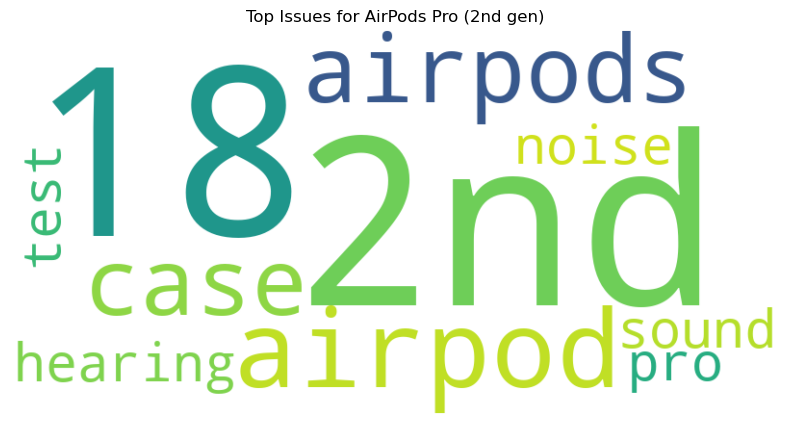

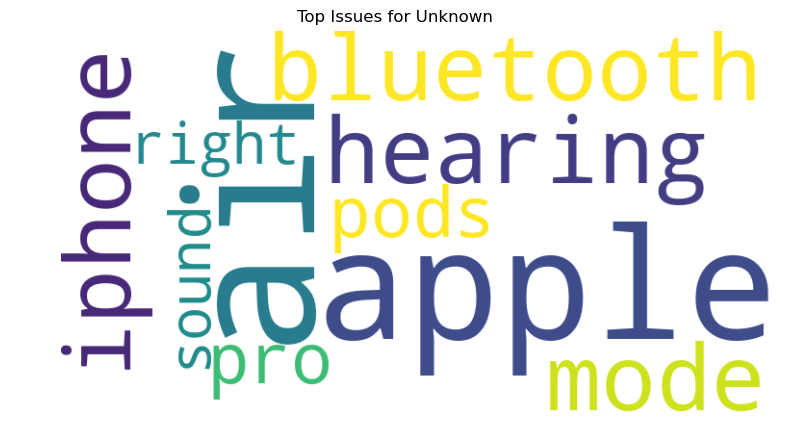

In [45]:
#Top Issues by AirPods Type
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Group questions by AirPods type
questions_by_type = df.groupby('Type')['Question'].apply(lambda x: ' '.join(x)).to_dict()

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10, stop_words='english')
top_terms = {}

# Extract top terms for each AirPods type
for airpods_type, questions in questions_by_type.items():
    tfidf_matrix = tfidf.fit_transform([questions])
    terms = tfidf.get_feature_names_out()
    scores = tfidf.idf_
    top_terms[airpods_type] = sorted(zip(terms, scores), key=lambda x: x[1])

# Visualize top terms for each type
for airpods_type, terms in top_terms.items():
    words = {term: score for term, score in terms}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Issues for {airpods_type}")
    plt.axis('off')
    plt.show()



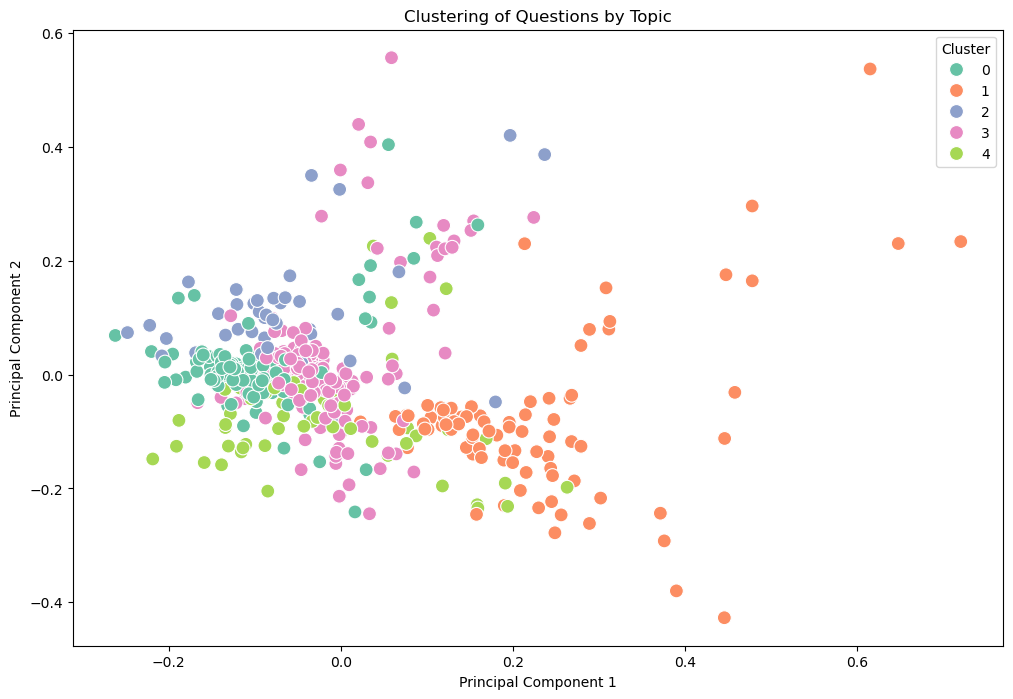


Cluster 0:
11, 18, 1st, 2023, 2024, 2d, 2nd, 3rd, 40, 5b58, 7a294, 7b21, a2084, a3047, account, active, adaptive, aid, aids, air, airpods, amazon, amber, anc, announcing, app, apple, applecare, argos, assist, assistance, auto, availability, background, bad, battery, black, bluetooth, box, boxes, brand, brands, button, buy, calls, canada, canceling, cancellation, cancelling, car, case, certain, charge, charging, check, chirping, choppy, classify, clicking, compatibility, compatible, connect, connection, constant, control, costco, country, coverage, czy, deactivate, death, devices, difference, different, disable, disappears, disconnect, disconnecting, display, does, doesn, don, drops, ear, earpods, ears, ecuador, error, experienced, expired, external, fails, faint, fake, feature, features, fee, finding, firmware, fit, fix, flashing, flickers, flights, forced, frequency, function, gen, generation, genuine, health, hear, hearing, help, high, hold, inbound, incoming, increase, influence, i

In [49]:
#cluster analysis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Convert questions to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
question_features = tfidf.fit_transform(df['Question']).toarray()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(question_features)

# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(question_features)

# Scatter plot of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Clustering of Questions by Topic')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display top terms in each cluster
for cluster_num in range(kmeans.n_clusters):
    cluster_indices = df[df['Cluster'] == cluster_num].index
    cluster_questions = ' '.join(df.loc[cluster_indices, 'Question'])
    tfidf.fit([cluster_questions])
    print(f"\nCluster {cluster_num}:")
    print(", ".join(tfidf.get_feature_names_out()))
